# Karar Ağacı Algoritması ile Kredi Skoru Sınıflandırması

In [36]:
#Kullanacağımız kütüphanelerimizi yüklüyoruz
from sklearn import tree
import pandas as pd
import os
from sklearn import preprocessing

print(os.getcwd())

C:\Users\musta\Desktop\KDS


## 1.Veri Toplama

In [37]:
dataset=pd.read_csv("CreditScoreClassificationDataset.csv")

## 2.Veri Analizi

In [38]:
dataset

,Age,Gender,Income,Education,MaritalStatus,NumberofChildren,HomeOwnership,CreditScore
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


## 3.Sonuçların Görselleştirilmesi

In [39]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
kfold=KFold(10,shuffle=True,random_state=True)

In [40]:
string_to_int= preprocessing.LabelEncoder()
dataset.Gender=string_to_int.fit_transform(dataset.Gender)
dataset.MaritalStatus=string_to_int.fit_transform(dataset.MaritalStatus)
dataset.HomeOwnership=string_to_int.fit_transform(dataset.HomeOwnership)
dataset.CreditScore=string_to_int.fit_transform(dataset.CreditScore)
dataset.Education=string_to_int.fit_transform(dataset.Education)

In [42]:
X=dataset.drop("CreditScore",axis=1)
y=dataset.CreditScore
k=0
accuracy=[]
for train,test in kfold.split(dataset):
    print(k,len(train),len(test))
    k+=1
    trainSet=dataset.iloc[train]
    testSet=dataset.iloc[test]

    dt=tree.DecisionTreeClassifier(criterion="gini")
    dt.fit(trainSet.drop("CreditScore",axis=1),trainSet.CreditScore)

    pred=dt.predict(testSet.drop("CreditScore",axis=1))
    score=accuracy_score(testSet.CreditScore,pred)
    accuracy.append(score)
    print("Accuracy:"+str(score))


0 147 17
Accuracy:0.9411764705882353
1 147 17
Accuracy:1.0
2 147 17
Accuracy:1.0
3 147 17
Accuracy:1.0
4 148 16
Accuracy:0.875
5 148 16
Accuracy:1.0
6 148 16
Accuracy:1.0
7 148 16
Accuracy:0.9375
8 148 16
Accuracy:1.0
9 148 16
Accuracy:0.9375


## 4.Sonuçların Yorumlanması 

0.9691176470588235


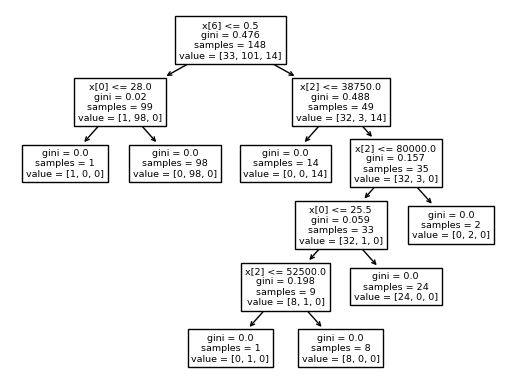

In [43]:
print(sum(accuracy)/len(accuracy))
from matplotlib import pyplot as plt
tree.plot_tree(dt)
plt.show()

Average Accuracy: 0.969


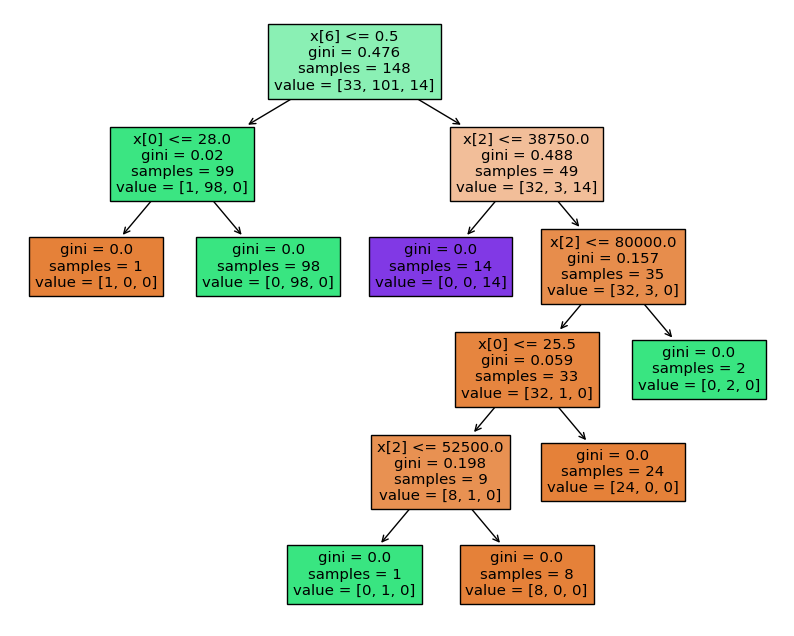

In [44]:
# Ortalama Doğruluğun Hesağlanması
avg_accuracy = sum(accuracy) / len(accuracy)
print(f"Average Accuracy: {avg_accuracy:.3f}")

# Karar ağacı çizimi
plt.figure(figsize=(10, 8))
tree.plot_tree(dt, filled=True)
plt.show()